Testinate:

In [1]:
from src.assignment2.simulation import HospitalSimulation, PatientState, WardType, WardConfig, WardsConfigurations, HospitalConfiguration
from scipy import stats
import numpy as np
import seaborn as sns

In [2]:

P = np.zeros([6,6])
P[0, :] = [0.0, 0.05, 0.10, 0.05, 0.80, 0.0]
P[1, :] = [0.20, 0.0, 0.50, 0.15, 0.15, 0.0]
P[2, :] = [0.30, 0.20, 0.0, 0.20, 0.30, 0.0]
P[3, :] = [0.35, 0.30, 0.05, 0.0, 0.30, 0.0]
P[4, :] = [0.20, 0.10, 0.60, 0.10, 0.0, 0.0] 
P[5, :] = [0.20, 0.20, 0.20, 0.20, 0.20, 0.0]

arr_Times = [14.5, 11.0, 8.0, 6.5, 5.0, 13.0]

len_stay = [2.9, 4.0, 4.5, 1.4, 3.9, 2.2]

urgency = [7, 5, 2, 10, 5, 0]

bed_capacity = [55, 40, 30, 20, 20, 0]

In [3]:
configs = [
    WardConfig(
        bed_capacity=55, 
        urgency=7, 
        mean_arrival_time=1/14.5, 
        mean_stay_time=2.9),
    WardConfig(40, 5, 1/11, 4),
    WardConfig(30, 2, 1/8, 4.5),
    WardConfig(20, 10, 1/6.5, 1.4),
    WardConfig(20, 5, 1/5, 3.9),
    WardConfig(0, 0, 1/13, 2.2)
]
std_configs = WardsConfigurations(configs)

std_switch = {
    WardType.A: list(P[0, :]),
    WardType.B: list(P[1, :]),
    WardType.C: list(P[2, :]),
    WardType.D: list(P[3, :]),
    WardType.E: list(P[4, :]),
    WardType.F: list(P[5, :])
}

def mean_exp_dist(mean_time):
    return stats.expon.rvs(scale=mean_time)

In [4]:
sim_config = HospitalConfiguration(std_configs, std_switch, mean_exp_dist, mean_exp_dist)
H_Sim = HospitalSimulation(sim_config)
N = 10

In [5]:
Simz = H_Sim.simulate_only_occupation(n=100)

In [ ]:
Simz2 = H_Sim.simulate_already_stolen(n=100)

(9008.258942664468, 9460.141057335533)

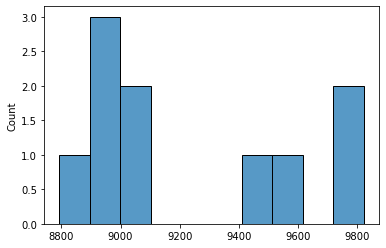

In [8]:
sns.histplot(penalty, bins = 10)
mu, sig = np.mean(penalty), np.std(penalty)
stats.norm.interval(0.95, loc=mu, scale=sig/np.sqrt(N))